In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# there are no missing value at all, but some feature, for exaple: BMI, cannot take the value 0. So first I will replace it with null value and then replace it with mean or sthg
df_copy = df.copy(deep=True)



In [9]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy.loc[:,('Glucose','BloodPressure','SkinThickness','Insulin','BMI')].replace(0,np.NaN)


In [10]:
df_copy.loc[:,('Glucose','BloodPressure','SkinThickness','Insulin','BMI')]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


In [11]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

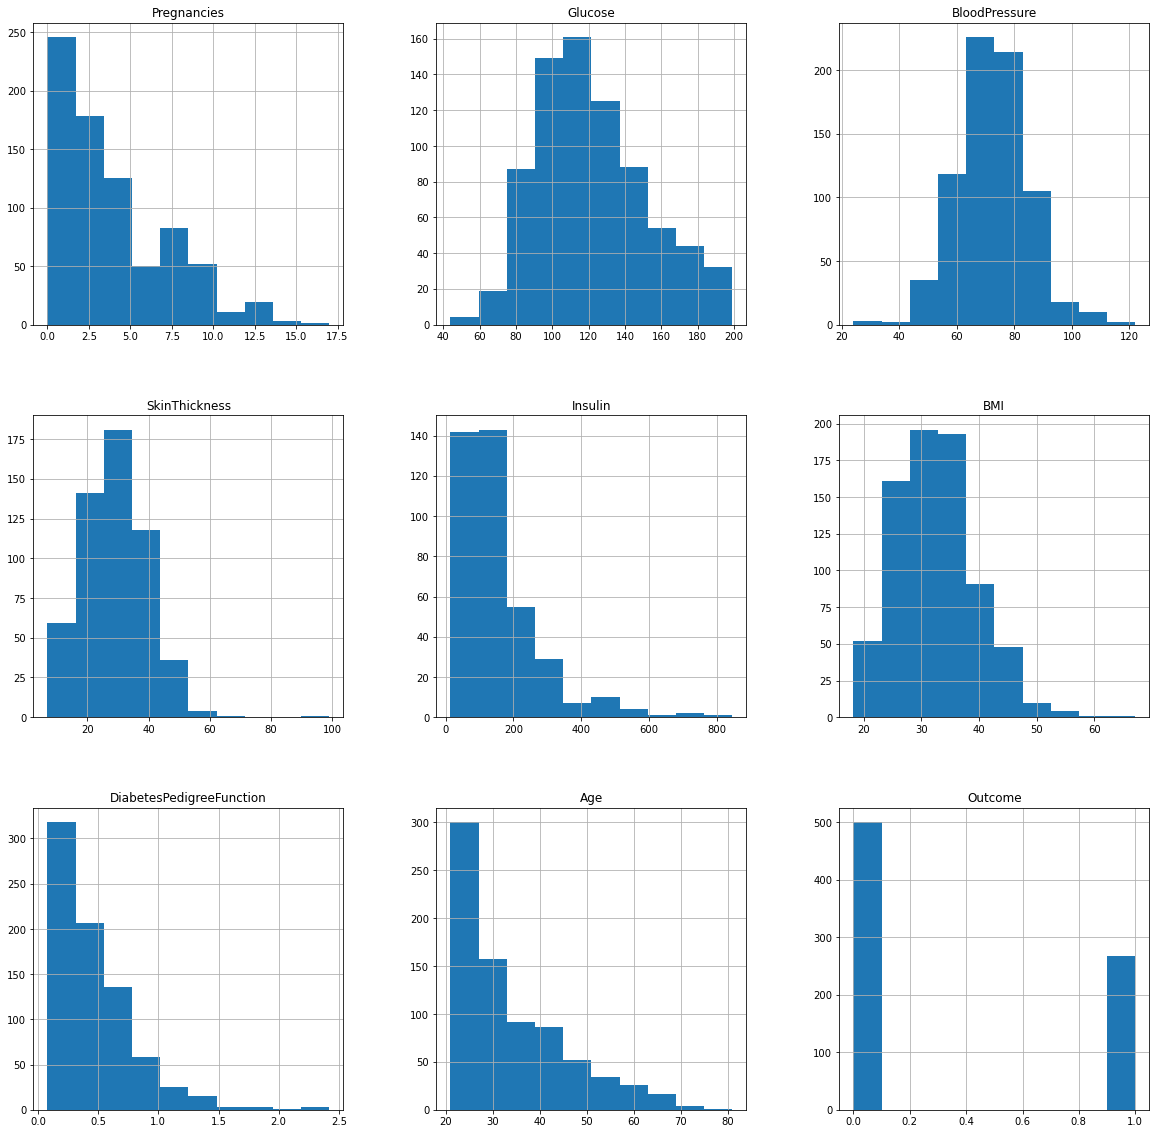

In [12]:
df_copy.hist(figsize=(20,20))

In [13]:
# we can see that Glucose, BloodPressure, SkinThickness and BMI has symmetrical distribution, so I decided to replace the null value with arithmetic mean
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)

In [14]:
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(),inplace=True)

In [15]:
df_copy['Insulin'].fillna(df_copy['Insulin'].mode()[0],inplace=True)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

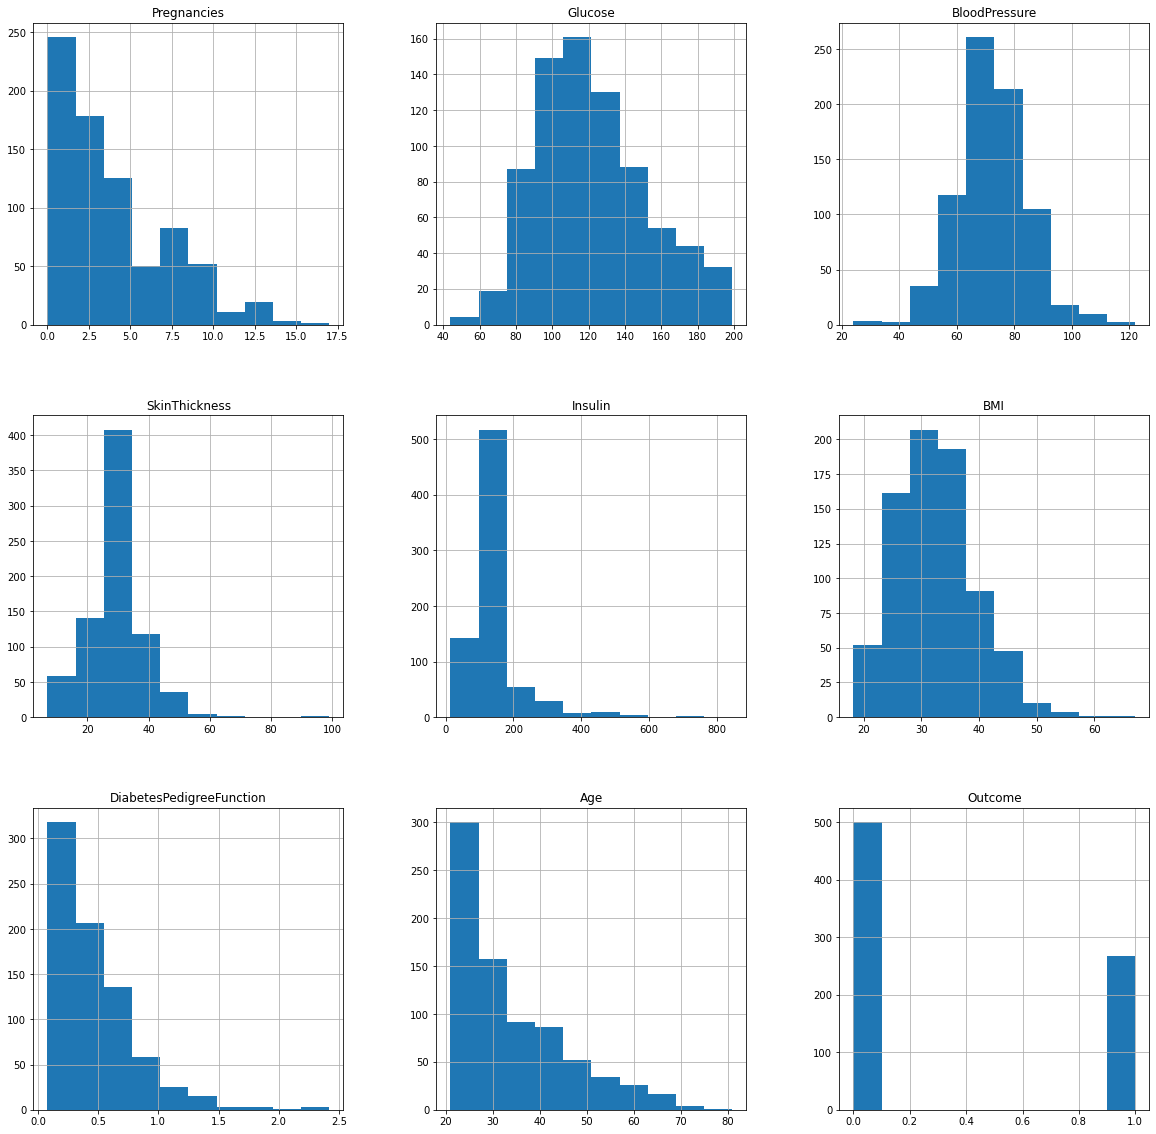

In [16]:
df_copy.hist(figsize=(20,20))

In [17]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
# class distribution
class_count= df_copy.groupby("Outcome").size()
class_count

Outcome
0    500
1    268
dtype: int64

In [19]:
# correlation matrix
corr = df_copy.corr(method="pearson")

corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.005204,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.411642,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.027149,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.150020,0.542398,0.100966,0.127872,0.215299
Insulin,0.005204,0.411642,0.027149,0.150020,1.000000,0.185798,0.141959,0.070669,0.193850
BMI,0.021565,0.230941,0.281268,0.542398,0.185798,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.141959,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.070669,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.193850,0.311924,0.173844,0.238356,1.000000


In [20]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [21]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,130.932292,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,88.700443,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,105.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,105.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
print(round(df_copy.mean(),2))

Pregnancies                   3.85
Glucose                     121.69
BloodPressure                72.41
SkinThickness                29.15
Insulin                     130.93
BMI                          32.46
DiabetesPedigreeFunction      0.47
Age                          33.24
Outcome                       0.35
dtype: float64


In [23]:
round(df_copy.std(),2)

Pregnancies                  3.37
Glucose                     30.44
BloodPressure               12.10
SkinThickness                8.79
Insulin                     88.70
BMI                          6.88
DiabetesPedigreeFunction     0.33
Age                         11.76
Outcome                      0.48
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_copy,test_size=0.2, random_state=42)

In [25]:
print(train_set.shape,test_set.shape)

(614, 9) (154, 9)


In [26]:
X_train = train_set.drop(columns=["Outcome"])
y_train = train_set['Outcome']
X_test = test_set.drop(columns = ["Outcome"])
y_test = test_set['Outcome']

In [27]:
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test)

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test=pca.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.7467532467532467


In [30]:
print(clf.coef_,clf.intercept_)

[[3.91288345 3.02964546 0.66612808]] [-0.78872048]


In [31]:
C_param_range = [0.001,0.01,0.1,1,10,100]
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 42)
    lr.fit(X_train,y_train)
    print(f"With C = {i}, Logistic Regression model score is :{lr.score(X_test,y_test)}")

With C = 0.001, Logistic Regression model score is :0.6428571428571429
With C = 0.01, Logistic Regression model score is :0.6428571428571429
With C = 0.1, Logistic Regression model score is :0.7207792207792207
With C = 1, Logistic Regression model score is :0.7467532467532467
With C = 10, Logistic Regression model score is :0.7467532467532467
With C = 100, Logistic Regression model score is :0.7467532467532467


In [32]:
from sklearn.svm import SVC
classifier = SVC(random_state=42, kernel="rbf")
classifier.fit(X_train,y_train)

SVC(random_state=42)

In [33]:
print(classifier.score(X_test, y_test))

0.7532467532467533


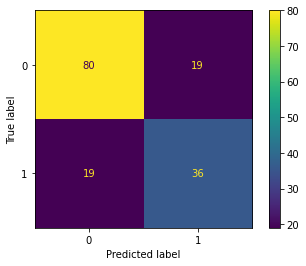

In [34]:
from sklearn.metrics import plot_confusion_matrix
# Cross Validation Classification Confusion Matrix

plot_confusion_matrix(classifier,X_test, y_test)

In [35]:
from sklearn.model_selection import GridSearchCV
# # defining parameter range
C=[0.1, 1, 10, 100, 1000]
gamma=[1, 0.1, 0.01, 0.001, 0.0001]
param_grid = {'C': C,
              'gamma': gamma,
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)
print("Best parameters: ",grid.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...............

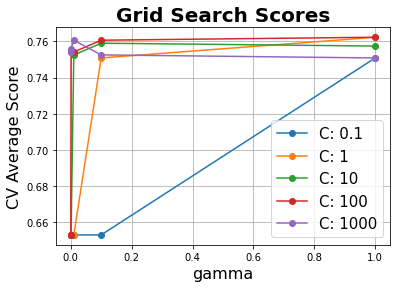

In [36]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
# Calling Method 
plot_grid_search(grid.cv_results_, gamma,C, 'gamma', 'C')

In [37]:
from numpy import set_printoptions
# Rescale data (between 0 and 1)
array = df_copy.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.671 0.49  0.304 0.109 0.315 0.234 0.483]
 [0.059 0.265 0.429 0.239 0.109 0.172 0.117 0.167]
 [0.471 0.897 0.408 0.241 0.109 0.104 0.254 0.183]
 [0.059 0.29  0.429 0.174 0.096 0.202 0.038 0.   ]
 [0.    0.6   0.163 0.304 0.185 0.509 0.944 0.2  ]]


In [38]:
from sklearn.preprocessing import StandardScaler
# Standardize data (0 mean, 1 stdev)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 6.399e-01  8.651e-01 -3.352e-02  6.655e-01 -2.925e-01  1.663e-01
   4.685e-01  1.426e+00]
 [-8.449e-01 -1.206e+00 -5.299e-01 -1.746e-02 -2.925e-01 -8.525e-01
  -3.651e-01 -1.907e-01]
 [ 1.234e+00  2.016e+00 -6.953e-01  8.088e-16 -2.925e-01 -1.333e+00
   6.044e-01 -1.056e-01]
 [-8.449e-01 -1.075e+00 -5.299e-01 -7.004e-01 -4.166e-01 -6.342e-01
  -9.208e-01 -1.042e+00]
 [-1.142e+00  5.035e-01 -2.681e+00  6.655e-01  4.182e-01  1.549e+00
   5.485e+00 -2.050e-02]]


In [39]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = LogisticRegression()
results = cross_val_score(model, rescaledX, Y, cv=kfold)
print(("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0))

Accuracy: 77.078% (5.842%)


Classification Accuracy

In [40]:
# Cross Validation Classification Accuracy
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.771 (0.058)


In [41]:
# Cross Validation Classification Accuracy
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
model = SVC(kernel="rbf")
scoring = 'accuracy'
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))

Accuracy: 0.764 (0.042)


Logarithmic loss

In [42]:
# Cross Validation Classification LogLoss
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

Logloss: -0.481 (0.070)


Area under Roc Curve

In [43]:
# Cross Validation Classification ROC AUC
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.831 (0.050)


In [44]:
# Cross Validation Classification ROC AUC
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
model = SVC(kernel="rbf")
scoring = 'roc_auc'
results = cross_val_score(model, rescaledX, Y, cv=kfold, scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.824 (0.048)


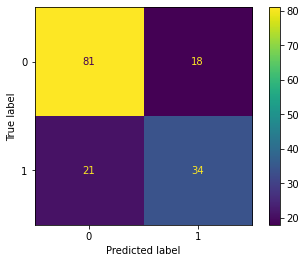

In [45]:
from sklearn.metrics import plot_confusion_matrix
# Cross Validation Classification Confusion Matrix
model = LogisticRegression()
model.fit(X_train, y_train)
plot_confusion_matrix(model,X_test, y_test)

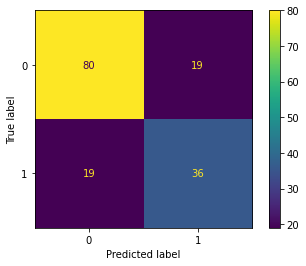

In [46]:
from sklearn.metrics import plot_confusion_matrix
# Cross Validation Classification Confusion Matrix
model = SVC(kernel="rbf")
model.fit(X_train, y_train)
plot_confusion_matrix(model,X_test, y_test)

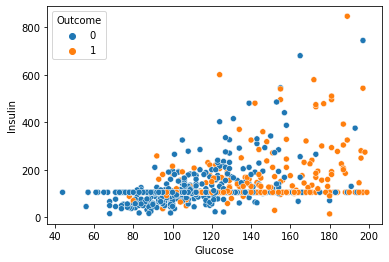

In [47]:
import seaborn as sns
ax=sns.scatterplot(x='Glucose',y='Insulin',hue='Outcome',data=df_copy)
plt.show()

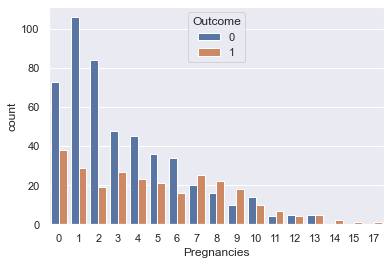

In [48]:

sns.set(style="darkgrid")

ax = sns.countplot(x="Pregnancies",hue="Outcome", data=df_copy)